In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import sklearn as sklearn
from bs4 import BeautifulSoup
from matplotlib import style
import datetime as dt
import yfinance as yf
%matplotlib inline
import matplotlib.dates as mdates 
from mplfinance.original_flavor import candlestick_ohlc


In [4]:
start= dt.datetime(2000,1,1)
end=dt.datetime(2016,12,31)
style.use('ggplot')

In [41]:
df = yf.Ticker("TLSA").history(period='5y')

print(df.head())

                               Open      High       Low     Close  Volume  \
Date                                                                        
2018-11-20 00:00:00-05:00  2.100840  2.100840  1.670668  1.670668   87465   
2018-11-21 00:00:00-05:00  1.838735  2.434974  1.838735  2.118848   38984   
2018-11-23 00:00:00-05:00  2.200880  2.200880  1.958784  1.960784   14994   
2018-11-26 00:00:00-05:00  1.940776  1.940776  1.552621  1.676671   24990   
2018-11-27 00:00:00-05:00  1.760704  1.800720  1.700680  1.792717   21991   

                           Dividends  Stock Splits  
Date                                                
2018-11-20 00:00:00-05:00          0           0.0  
2018-11-21 00:00:00-05:00          0           0.0  
2018-11-23 00:00:00-05:00          0           0.0  
2018-11-26 00:00:00-05:00          0           0.0  
2018-11-27 00:00:00-05:00          0           0.0  


In [26]:
df['Open'].tail()

Date
2022-12-28 00:00:00-05:00    0.61
2022-12-29 00:00:00-05:00    0.54
2022-12-30 00:00:00-05:00    0.55
2023-01-03 00:00:00-05:00    0.58
2023-01-04 00:00:00-05:00    0.61
Name: Open, dtype: float64

In [27]:
data= pd.read_csv('fin.csv',parse_dates=True,index_col=0)
print (data.head())

                               Open      High       Low     Close  Volume  \
Date                                                                        
2018-11-20 00:00:00-05:00  2.100840  2.100840  1.670668  1.670668   87465   
2018-11-21 00:00:00-05:00  1.838735  2.434974  1.838735  2.118848   38984   
2018-11-23 00:00:00-05:00  2.200880  2.200880  1.958784  1.960784   14994   
2018-11-26 00:00:00-05:00  1.940776  1.940776  1.552621  1.676671   24990   
2018-11-27 00:00:00-05:00  1.760704  1.800720  1.700680  1.792717   21991   

                           Dividends  Stock Splits  
Date                                                
2018-11-20 00:00:00-05:00          0           0.0  
2018-11-21 00:00:00-05:00          0           0.0  
2018-11-23 00:00:00-05:00          0           0.0  
2018-11-26 00:00:00-05:00          0           0.0  
2018-11-27 00:00:00-05:00          0           0.0  


<AxesSubplot:xlabel='Date'>

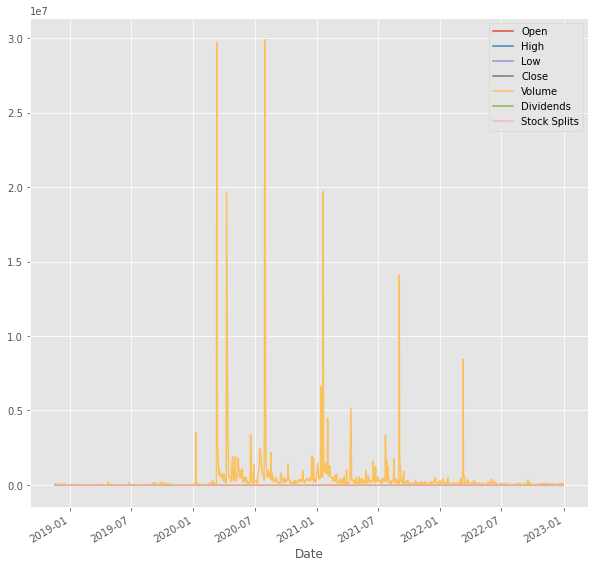

In [28]:
data.plot(figsize=(10,10))

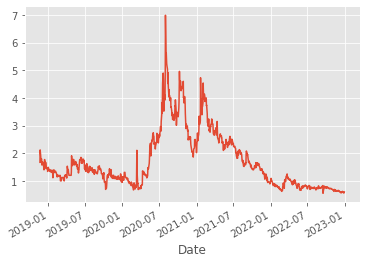

In [38]:
data['Close'].plot()
plt.show()

In [39]:
data[['High','Low']]

,High,Low
Date,,
2018-11-20 00:00:00-05:00,2.100840,1.670668
2018-11-21 00:00:00-05:00,2.434974,1.838735
2018-11-23 00:00:00-05:00,2.200880,1.958784
2018-11-26 00:00:00-05:00,1.940776,1.552621
2018-11-27 00:00:00-05:00,1.800720,1.700680
...,...,...
2022-12-23 00:00:00-05:00,0.610000,0.580000
2022-12-27 00:00:00-05:00,0.600000,0.540000
2022-12-28 00:00:00-05:00,0.610000,0.530000


                               Open      High       Low     Close  Volume  \
Date                                                                        
2018-11-20 00:00:00-05:00  2.100840  2.100840  1.670668  1.670668   87465   
2018-11-21 00:00:00-05:00  1.838735  2.434974  1.838735  2.118848   38984   
2018-11-23 00:00:00-05:00  2.200880  2.200880  1.958784  1.960784   14994   
2018-11-26 00:00:00-05:00  1.940776  1.940776  1.552621  1.676671   24990   
2018-11-27 00:00:00-05:00  1.760704  1.800720  1.700680  1.792717   21991   

                           Dividends  Stock Splits     100ma  
Date                                                          
2018-11-20 00:00:00-05:00          0           0.0  1.670668  
2018-11-21 00:00:00-05:00          0           0.0  1.894758  
2018-11-23 00:00:00-05:00          0           0.0  1.916767  
2018-11-26 00:00:00-05:00          0           0.0  1.856743  
2018-11-27 00:00:00-05:00          0           0.0  1.843938  


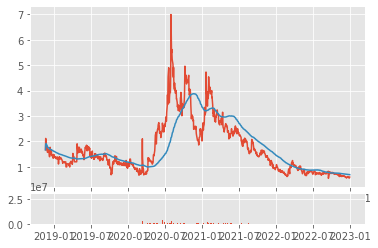

In [42]:
data['100ma'] = data['Close'].rolling(window=100, min_periods=0).mean()
print(data.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(data.index, data['Close'])
ax1.plot(data.index, data['100ma'])
ax2.bar(data.index, data['Volume'])

plt.show()

In [58]:
df_ohlc = data['Stock Splits'].resample('1D').ohlc()

In [59]:
df_volume = data['Volume'].resample('10D').sum()

In [61]:
print(df_ohlc.tail())

            open   high  low  close
100ma                              
1970-01-01   0.0  2.499  0.0    0.0


In [65]:
df_ohlc = df_ohlc.reset_index()

In [70]:
import mplfinance as mpf

C:\Users\aheed\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


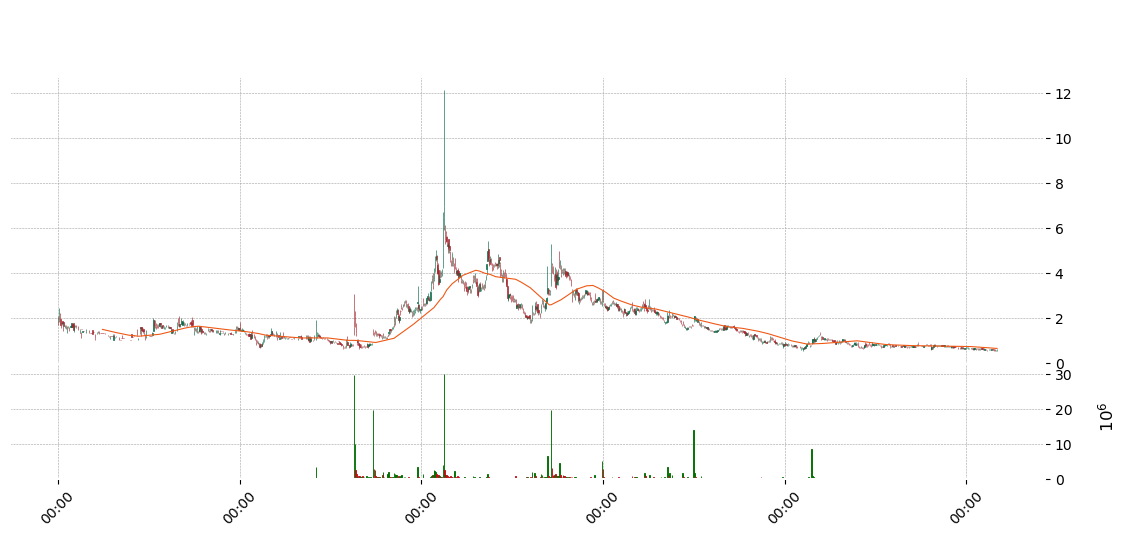

In [73]:
mpf.plot(data, type='candle', style='charles',
            title='  ',
            ylabel='  ',
            ylabel_lower='  ',
            figratio=(25,10),
            figscale=1,
            mav=50,
            volume=True)

In [106]:
apple= yf.Ticker("AAPL").history(period='60D')



In [103]:
apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-21 00:00:00-05:00,150.160004,150.369995,147.720001,148.009995,58724100,0,0
2022-11-22 00:00:00-05:00,148.130005,150.419998,146.929993,150.179993,51804100,0,0
2022-11-23 00:00:00-05:00,149.449997,151.830002,149.339996,151.070007,58301400,0,0
2022-11-25 00:00:00-05:00,148.309998,148.880005,147.119995,148.110001,35195900,0,0
2022-11-28 00:00:00-05:00,145.139999,146.639999,143.380005,144.220001,69246000,0,0


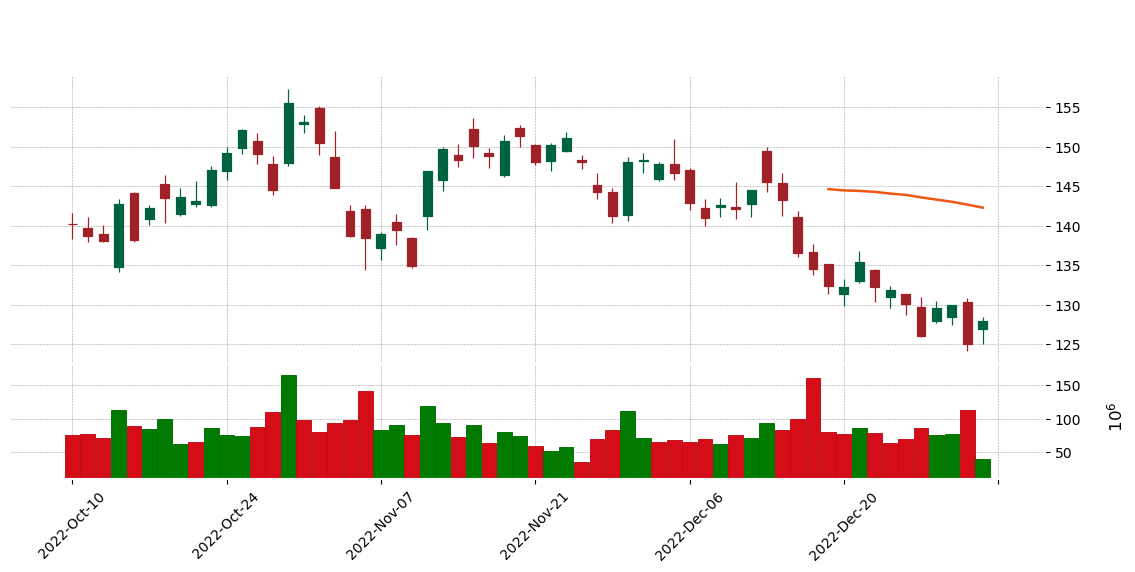

In [107]:
mpf.plot(apple, type='candle', style='charles',
            title='  ',
            ylabel='  ',
            ylabel_lower='  ',
            figratio=(25,10),
            figscale=1,
            mav=50,
            volume=True)

In [101]:
tesla= yf.Ticker("TLSA").history(period='1Y')


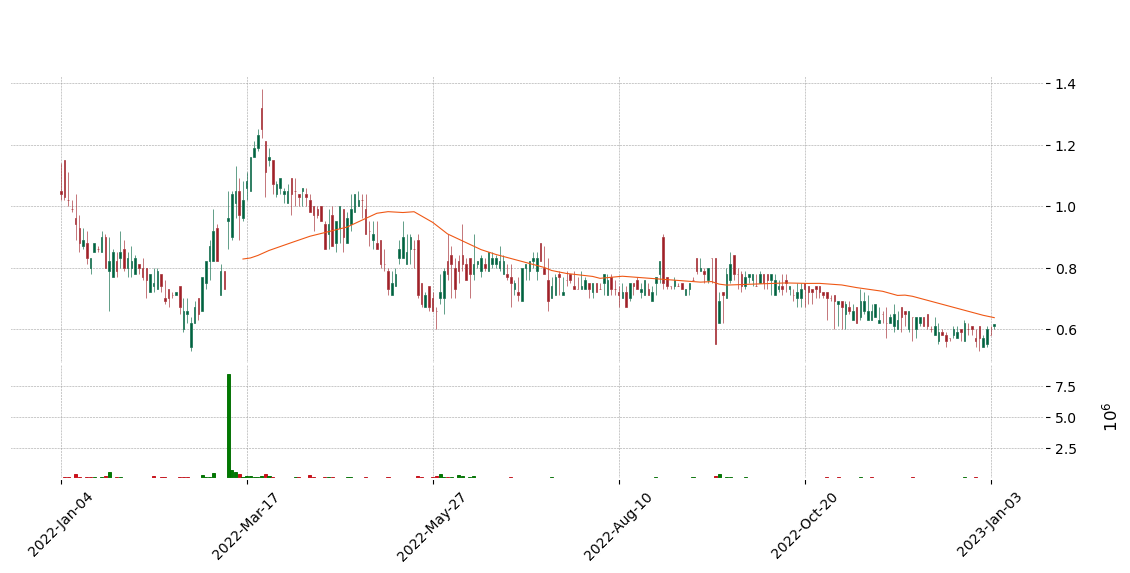

In [102]:
mpf.plot(tesla, type='candle', style='charles',
            title='  ',
            ylabel='  ',
            ylabel_lower='  ',
            figratio=(25,10),
            figscale=1,
            mav=50,
            volume=True)